In [29]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [30]:
#API from CDC; shows # of NJ cases by county for June 2021

url = "https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000"

#how to filter for NJ first, date, and then 20000 cases?

In [31]:
response = requests.get(url)
print(response.url)


https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000


In [32]:
data = response.json()
# Use json.dumps to print the json
#print(json.dumps(data, indent=4, sort_keys=True))

#print data frame

df = pd.DataFrame(data)
df
      

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
0,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN,NaN
1,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,Yes,Missing,No,0.0,NaN
2,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,0.0,NaN
3,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,0.0,NaN
4,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
8784,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
8785,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
8786,2021-06,NJ,34,NA,NA,50 to 64 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN


In [33]:
#Total # of cases

num_cases = df["res_state"].count()

df_total_cases = pd.DataFrame({"Total # of NJ cases in June 2021":[num_cases]})
df_total_cases



,Total # of NJ cases in June 2021
0,8788


In [34]:
num_hosp = df["hosp_yn"].value_counts()
num_hosp

No         4738
Missing    3477
Yes         573
Name: hosp_yn, dtype: int64

In [35]:
df_num_hosp = df[df['hosp_yn'] == "Yes"]
df_num_hosp 

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
1,2021-06,NJ,34,CAPE MAY,34009,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,Yes,Missing,No,0.0,NaN
49,2021-06,NJ,34,MIDDLESEX,34023,18 to 49 years,Male,White,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,No,NaN,NaN
83,2021-06,NJ,34,CUMBERLAND,34011,0 - 17 years,Female,NA,NA,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,0.0,NaN
132,2021-06,NJ,34,SUSSEX,34037,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,0.0,NaN
135,2021-06,NJ,34,SUSSEX,34037,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8673,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,Missing,Missing,Probable Case,Symptomatic,Yes,Missing,No,0.0,NaN
8713,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,No,NaN,NaN
8739,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,NA,NaN,NaN
8770,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,0.0,NaN


In [36]:
df_num_hosp_county   = df_num_hosp.groupby(['res_county','county_fips_code'], as_index=False).count()

df_num_hosp_county = df_num_hosp_county[['res_county', 'case_month', 'county_fips_code']].copy()

df_num_hosp_county.rename(columns = {'res_county':'County','case_month':'Total # of Hospitalizations by NJ County in June 2021','county_fips_code':'County_Num'}, inplace = True)
df_num_hosp_county.sort_values('Total # of Hospitalizations by NJ County in June 2021',ascending=False)

df_num_hosp_index_to_county = df_num_hosp_county.set_index('County')
df_num_hosp_index_to_county.sort_values('Total # of Hospitalizations by NJ County in June 2021',ascending=False)

,Total # of Hospitalizations by NJ County in June 2021,County_Num
County,,
ESSEX,65,34013
PASSAIC,63,34031
BERGEN,53,34003
OCEAN,50,34029
BURLINGTON,40,34005
MONMOUTH,37,34025
HUDSON,33,34017
MIDDLESEX,32,34023
CAMDEN,30,34007


In [37]:
df_num_cases_county  = df.groupby(['res_county', 'county_fips_code'], as_index=False).count()

df_num_cases_county = df_num_cases_county[['res_county', 'case_month', 'county_fips_code']].copy()

In [38]:
df_num_cases_county.rename(columns = {'res_county':'County','case_month':'Total # of Cases by NJ County in June 2021','county_fips_code':'County_Num'}, inplace = True)
df_num_cases_county.sort_values('Total # of Cases by NJ County in June 2021',ascending=False)

df_index_to_county = df_num_cases_county.set_index('County')
df_index_to_county.sort_values('Total # of Cases by NJ County in June 2021',ascending=False)


,Total # of Cases by NJ County in June 2021,County_Num
County,,
MONMOUTH,1029,34025
ESSEX,838,34013
BERGEN,815,34003
OCEAN,773,34029
MIDDLESEX,726,34023
PASSAIC,611,34031
UNION,576,34039
HUDSON,525,34017
CAMDEN,428,34007


In [39]:
#combine hosp and # of cases data (June 2021)

hos_and_cases_df = pd.merge(df_num_hosp_county, df_num_cases_county, on='County_Num')

hos_and_cases_df.drop(columns=['County_x'])

hos_and_cases_df = hos_and_cases_df[['County_y', 'County_Num', 'Total # of Cases by NJ County in June 2021', 'Total # of Hospitalizations by NJ County in June 2021']]

hos_and_cases_df = hos_and_cases_df.rename(columns = {'County_y' : 'County'})
hos_and_cases_df_index_to_county = hos_and_cases_df.set_index('County')
hos_and_cases_df_index_to_county.sort_values('Total # of Cases by NJ County in June 2021',ascending=False)


,County_Num,Total # of Cases by NJ County in June 2021,Total # of Hospitalizations by NJ County in June 2021
County,,,
MONMOUTH,34025,1029,37
ESSEX,34013,838,65
BERGEN,34003,815,53
OCEAN,34029,773,50
MIDDLESEX,34023,726,32
PASSAIC,34031,611,63
UNION,34039,576,29
HUDSON,34017,525,33
CAMDEN,34007,428,30


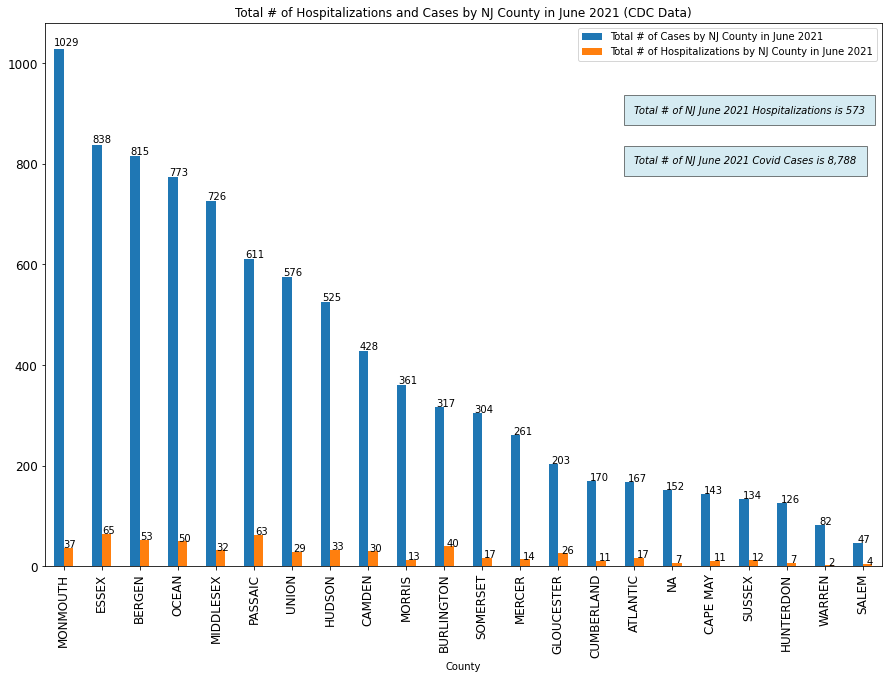

In [65]:
hosp_and_cases_bar_chart = hos_and_cases_df_index_to_county.sort_values('Total # of Cases by NJ County in June 2021',ascending=False).plot(kind='bar', title ="Total # of Hospitalizations and Cases by NJ County in June 2021 (CDC Data)", figsize=(15, 10), legend=True, fontsize=12)

#patch represents a bar in this case.   and str() will indicate the label of each patch. 
for p in hosp_and_cases_bar_chart.patches:
    hosp_and_cases_bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

hosp_and_cases_bar_chart.text(15, 900, 'Total # of NJ June 2021 Hospitalizations is 573', style='italic',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

hosp_and_cases_bar_chart.text(15, 800, 'Total # of NJ June 2021 Covid Cases is 8,788', style='italic',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

hosp_and_cases_bar_chart

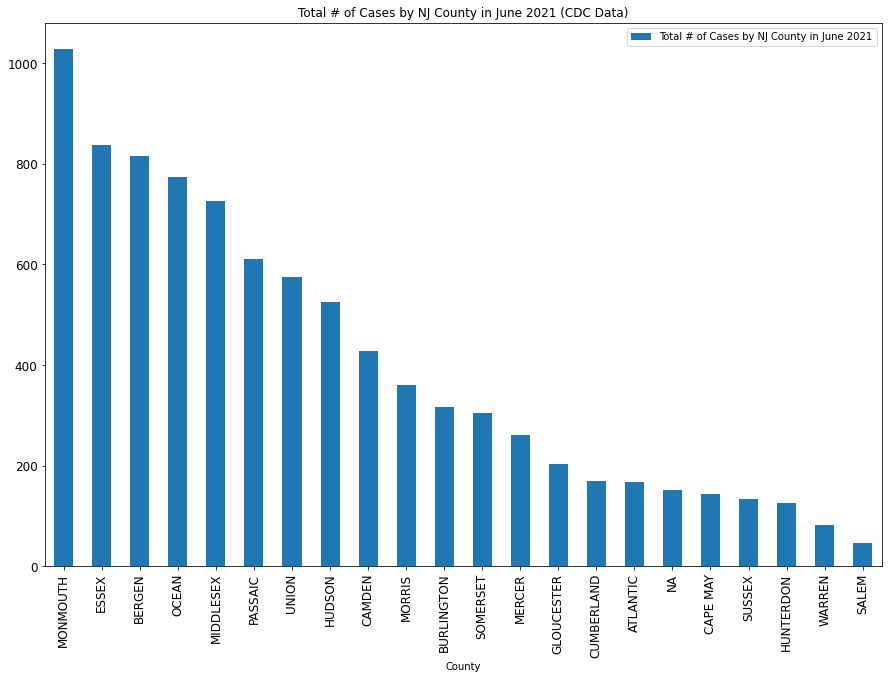

In [41]:
#create a bar chart

cases_bar_chart = df_index_to_county.sort_values('Total # of Cases by NJ County in June 2021',ascending=False).plot(kind='bar', title ="Total # of Cases by NJ County in June 2021 (CDC Data)", figsize=(15, 10), legend=True, fontsize=12)

cases_bar_chart

In [42]:
# total  data

total_case_df = pd.read_csv("covid_confirmed_usafacts.csv")
total_case_df

,countyFIPS,County Name,State,StateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,7/6/2021,7/7/2021,7/8/2021,7/9/2021,7/10/2021,7/11/2021,7/12/2021,7/13/2021,7/14/2021,7/15/2021
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7262,7277,7277,7294,7299,7299,7306,7306,7320,7329
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,22043,22154,22154,22220,22267,22267,22337,22337,22464,22556
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2347,2354,2354,2361,2365,2365,2367,2367,2373,2377
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2693,2699,2699,2699,2702,2702,2704,2704,2708,2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4801,4805,4820,4820,4833,4833,4853,4859,4869,4876
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,3804,3805,3807,3807,3816,3816,3824,3826,3831,3834
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,2325,2327,2328,2328,2329,2329,2329,2330,2332,2333
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,927,927,929,929,929,929,929,929,929,932


In [43]:
total_case_df_revised = total_case_df[["County Name", "countyFIPS", "State","7/15/2021"]]

total_case_df_revised = total_case_df_revised.loc[total_case_df_revised["State"] == "NJ", :]
total_case_df_revised = total_case_df_revised.groupby(['County Name', 'countyFIPS'], as_index=False).sum()
total_case_df_revised = total_case_df_revised.rename(columns = {'County Name' : 'County', 'countyFIPS' : 'County_Num', '7/15/2021' : 'Total Cumulative Cases as of 7/15/21'})
#total_case_df_revised = total_case_df_revised.sort_values('Total Cumulative Cases as of 7/15/21',ascending=False)
#total_case_df_revised = total_case_df_revised.drop(18).reset_index(drop=True)
total_case_df_revised['County_Num'] = total_case_df_revised['County_Num'].astype(str)
total_case_df_revised

,County,County_Num,Total Cumulative Cases as of 7/15/21
0,Atlantic County,34001,31812
1,Bergen County,34003,105384
2,Burlington County,34005,44598
3,Camden County,34007,56208
4,Cape May County,34009,9318
5,Cumberland County,34011,17292
6,Essex County,34013,94829
7,Gloucester County,34015,30826
8,Hudson County,34017,88604
9,Hunterdon County,34019,9945


In [44]:
tot_cumulative_cases = total_case_df_revised["Total Cumulative Cases as of 7/15/21"].sum()


df_tot_cumulative_cases = pd.DataFrame({"Total Cumulative Cases as of 7/15/21":[tot_cumulative_cases]})
df_tot_cumulative_cases


,Total Cumulative Cases as of 7/15/21
0,1027460


In [45]:
# 2019 population per NJ county; 2019 is the most recent data available
url_pop = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9"


pop_response = requests.get(url_pop)
print(pop_response.url)



https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9


In [46]:
pop_data = pop_response.json()
#print(json.dumps(pop_data, indent=4, sort_keys=True))
pop_df = pd.DataFrame(pop_data)
#pop_df 

In [47]:
pop_df_renamed = pd.DataFrame((pop_data), columns=("County","Population","State_Num","County_Num"))
pop_df_renamed = pop_df_renamed.drop(0).reset_index(drop=True)
pop_df_renamed["County"] = pop_df_renamed["County"].str.split(',',expand=True)
pop_df_renamed["County"] = pop_df_renamed["County"].str.split(' ',expand=True)
pop_df_renamed["County_Num"] = pop_df_renamed["State_Num"] + pop_df_renamed["County_Num"]
pop_df_renamed["Population"] = pop_df_renamed["Population"].astype(float)


tot_pop = pop_df_renamed["Population"].sum()
tot_pop

df_tot_pop = pd.DataFrame({"Total Population per NJ County":[tot_pop]})
df_tot_pop


,Total Population per NJ County
0,8882190.0


In [48]:
county_population_percentage = (pop_df_renamed['Population'] / tot_pop ) * 100
#county_population_percentage

In [49]:

pop_df_renamed = pd.DataFrame((pop_data), columns=("County","Population","State_Num","County_Num"))
pop_df_renamed = pop_df_renamed.drop(0).reset_index(drop=True)
pop_df_renamed["County"] = pop_df_renamed["County"].str.split(',',expand=True)
pop_df_renamed["County"] = pop_df_renamed["County"].str.split(' ',expand=True)
pop_df_renamed["County_Num"] = pop_df_renamed["State_Num"] + pop_df_renamed["County_Num"]
pop_df_renamed["Population"] = pop_df_renamed["Population"].astype(int)

pop_df_renamed['County'] = pop_df_renamed['County'].str.upper()
#pop_df_renamed.set_index('County')
pop_df_renamed.sort_values('Population',ascending=False)
#pop_df_renamed = pop_df_renamed.set_index('County')
pop_df_renamed

,County,Population,State_Num,County_Num
0,MONMOUTH,618795,34,34025
1,MERCER,367430,34,34021
2,SUSSEX,140488,34,34037
3,CUMBERLAND,149527,34,34011
4,SOMERSET,328934,34,34035
5,OCEAN,607186,34,34029
6,ATLANTIC,263670,34,34001
7,GLOUCESTER,291636,34,34015
8,SALEM,62385,34,34033
9,PASSAIC,501826,34,34031


In [50]:
pop_total_cases_df = pd.merge(pop_df_renamed, total_case_df_revised, how="left", on='County_Num')

pop_total_cases_df = pop_total_cases_df[['County_x', 'County_Num', 'Population', 'Total Cumulative Cases as of 7/15/21']]

pop_total_cases_df = pop_total_cases_df .rename(columns = {'County_x':'County'})

pop_total_cases_df

,County,County_Num,Population,Total Cumulative Cases as of 7/15/21
0,MONMOUTH,34025,618795,76687
1,MERCER,34021,367430,34270
2,SUSSEX,34037,140488,14165
3,CUMBERLAND,34011,149527,17292
4,SOMERSET,34035,328934,30376
5,OCEAN,34029,607186,76893
6,ATLANTIC,34001,263670,31812
7,GLOUCESTER,34015,291636,30826
8,SALEM,34033,62385,6140
9,PASSAIC,34031,501826,73638


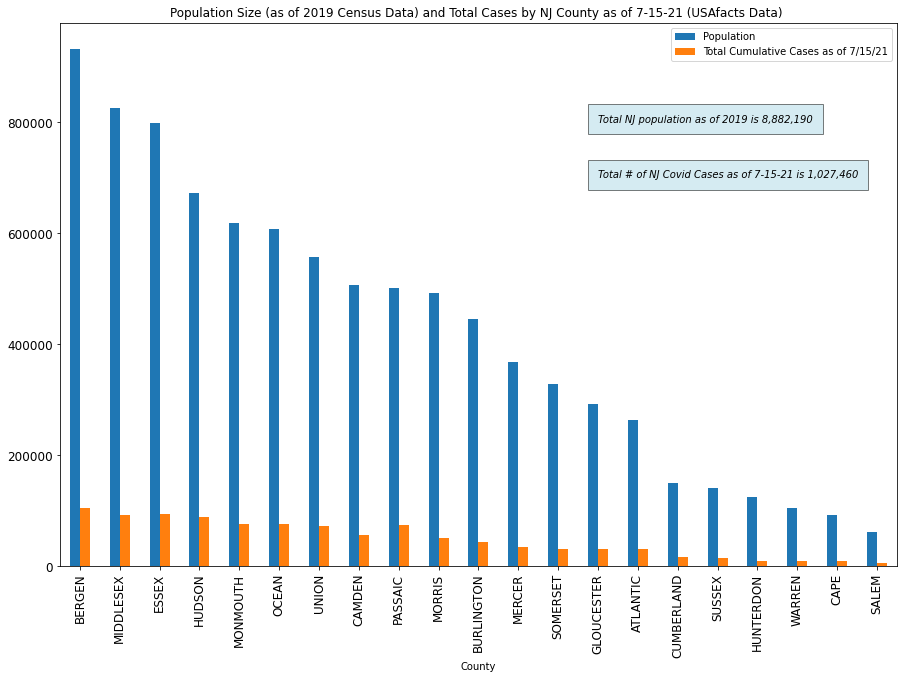

In [68]:
pop_total_cases_df_index_change = pop_total_cases_df.set_index('County')

bar_chart_pop_total_cases = pop_total_cases_df_index_change.sort_values('Population',ascending=False).plot(kind='bar', title ="Population Size (as of 2019 Census Data) and Total Cases by NJ County as of 7-15-21 (USAfacts Data) ", figsize=(15, 10), legend=True, fontsize=12)

bar_chart_pop_total_cases.text(13, 800000, 'Total NJ population as of 2019 is 8,882,190', style='italic',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

bar_chart_pop_total_cases.text(13, 700000, 'Total # of NJ Covid Cases as of 7-15-21 is 1,027,460', style='italic',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
bar_chart_pop_total_cases 

In [52]:


#df_num_cases_county.join(pop_df_renamed)

#combined_df = pd.concat([df_num_cases_county, pop_df_renamed], axis=1)


combined_df = pd.merge(pop_df_renamed,  hos_and_cases_df, how="left", on='County_Num')

combined_df2 = pd.merge(combined_df , total_case_df_revised, how="left", on= 'County_Num')

combined_df2 = combined_df2.drop(columns=['County_x'])

combined_df2 = combined_df2[['County_y', 'County_Num', 'Population', 'Total Cumulative Cases as of 7/15/21', 'Total # of Cases by NJ County in June 2021', 'Total # of Hospitalizations by NJ County in June 2021']]

combined_df2 = combined_df2.sort_values('Population',ascending=False)

combined_df2 = combined_df2.rename(columns = {'County_y':'County'})
combined_df2

,County,County_Num,Population,Total Cumulative Cases as of 7/15/21,Total # of Cases by NJ County in June 2021,Total # of Hospitalizations by NJ County in June 2021
12,BERGEN,34003,932202,105384,815,53
19,MIDDLESEX,34023,825062,92933,726,32
20,ESSEX,34013,798975,94829,838,65
15,HUDSON,34017,672391,88604,525,33
0,MONMOUTH,34025,618795,76687,1029,37
5,OCEAN,34029,607186,76893,773,50
13,UNION,34039,556341,72046,576,29
11,CAMDEN,34007,506471,56208,428,30
9,PASSAIC,34031,501826,73638,611,63
18,MORRIS,34027,491845,50596,361,13


The r-squared is: 0.8106871262886763
The correlation between Population and # of June 2021 NJ Cases is 0.9


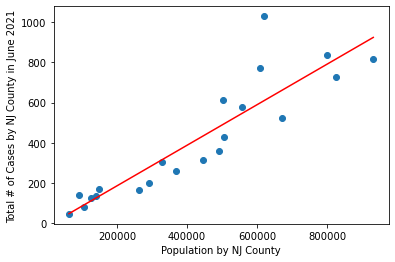

In [53]:
#LINEAR REGRESSION
#Research Question: Is there correlation between June 2021 num of cases and total population by county
#Null : no correlation
#Alternative Hypothesis: very correlated (what we want to prove)

plt.scatter(combined_df2.iloc[:,2],combined_df2.iloc[:,4])
plt.xlabel('Population by NJ County')
plt.ylabel('Total # of Cases by NJ County in June 2021')
population = combined_df2.iloc[:,2]
num_cases_june = combined_df2.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(population, num_cases_june)
regress_values = population * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(population,regress_values,"r-")
correlation = st.pearsonr(population,num_cases_june)
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between Population and # of June 2021 NJ Cases is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.9673244235028329
The correlation between Population and Total Cumulative Covid Cases is 0.98


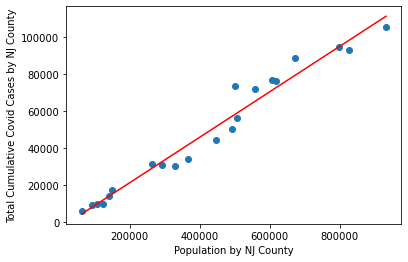

In [54]:
#LINEAR REGRESSION
#Research Question: Is there correlation between total cumulative num of cases and total population by county
#Null : no correlation
#Alternative Hypothesis: very correlated (what we want to prove)

plt.scatter(combined_df2.iloc[:,2],combined_df2.iloc[:,3])
plt.xlabel('Population by NJ County')
plt.ylabel('Total Cumulative Covid Cases by NJ County')
population = combined_df2.iloc[:,2]
total_num_cases = combined_df2.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(population, total_num_cases)
regress_values = population * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(population,regress_values,"r-")
correlation = st.pearsonr(population,total_num_cases)
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between Population and Total Cumulative Covid Cases is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.6731331248506895
The correlation between # of Cases and # of Hospitalizations in June 2021 is 0.82


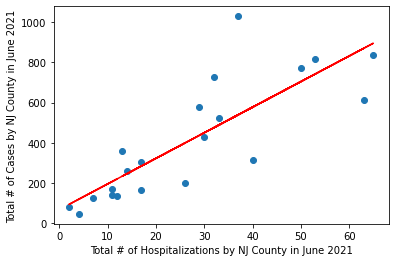

In [55]:
#Research Question: Is there correlation between June 2021 num of hospitalizations and num of cases? 
#Null : no correlation
#Alternative Hypothesis: very correlated (what we want to prove)

plt.scatter(combined_df2.iloc[:,5],combined_df2.iloc[:,4])
plt.xlabel('Total # of Hospitalizations by NJ County in June 2021') 
plt.ylabel('Total # of Cases by NJ County in June 2021')
num_cases_june = combined_df2.iloc[:,4]
num_hosp = combined_df2.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(num_hosp, num_cases_june)
regress_values = num_hosp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(num_hosp,regress_values,"r-")
correlation2 = st.pearsonr(num_hosp, num_cases_june)
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between # of Cases and # of Hospitalizations in June 2021 is {round(correlation2[0],2)}")
plt.show()